In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('StudentsPerformance.csv')       # Dataset from kaggle
print(data.shape)
data.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# EXPLORING THE DATA FEATURES

In [6]:
data['gender'].value_counts(normalize = True)   # Counting the relative frequencies of there occurences.

female    0.518
male      0.482
Name: gender, dtype: float64

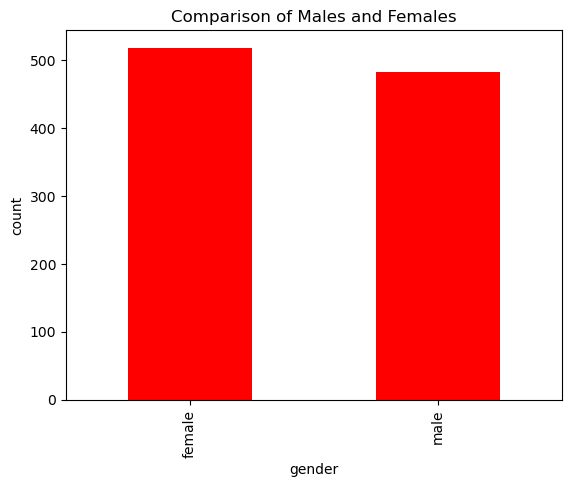

In [7]:
data['gender'].value_counts(dropna = False).plot.bar(color = 'red')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()              # Visualising the number of male and female in the dataset

In [8]:
print(data['race/ethnicity'].value_counts(normalize = True))
print()
print(data['race/ethnicity'].value_counts())

group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race/ethnicity, dtype: float64

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


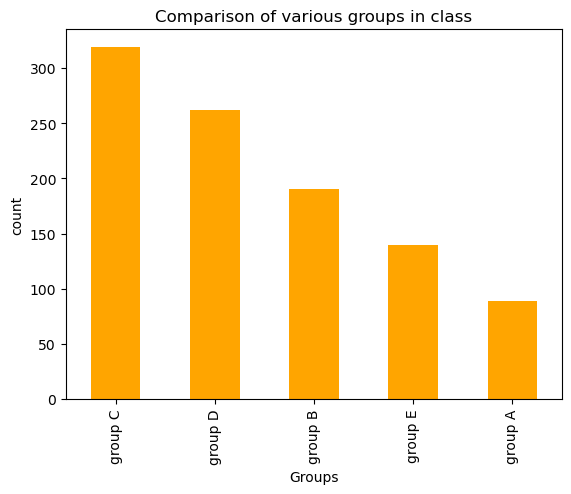

In [9]:
data['race/ethnicity'].value_counts(dropna = False).plot.bar(color = 'orange')
plt.title('Comparison of various groups in class')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()                    # Visualizing the different groups in the dataset

some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parental level of education, dtype: float64



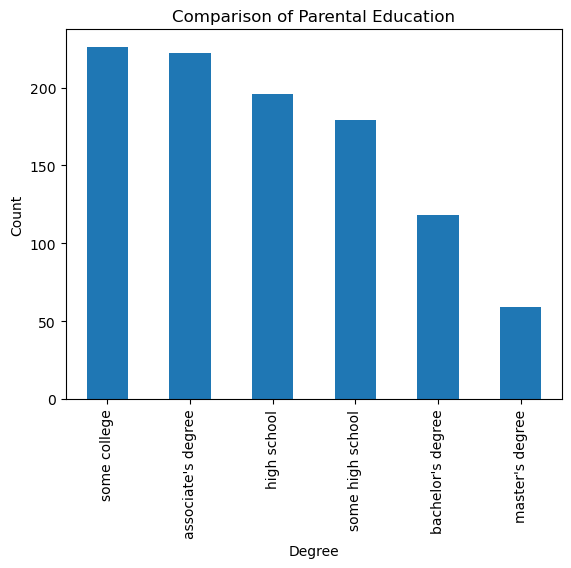

In [10]:
print(data['parental level of education'].value_counts(normalize = True))
print()
data['parental level of education'].value_counts(dropna = False).plot.bar()
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()               # Visualizing the different parental education levels

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64



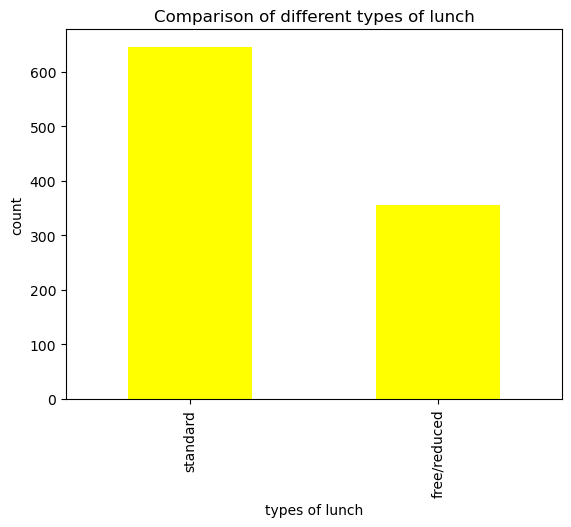

In [11]:
print(data['lunch'].value_counts(normalize = True))
print()
data['lunch'].value_counts(dropna = False).plot.bar(color = 'yellow')
plt.title('Comparison of different types of lunch')
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()                  # Visualizing different types of lunches

[0.036 0.035 0.032 0.027 0.026 0.025 0.024 0.022 0.021 0.02  0.018 0.017
 0.016 0.015 0.014 0.011 0.01  0.009 0.008 0.007 0.006 0.005 0.004 0.003
 0.002 0.001]

65    0.036
62    0.035
69    0.032
59    0.032
61    0.027
      ...  
24    0.001
28    0.001
33    0.001
18    0.001
8     0.001
Name: math score, Length: 81, dtype: float64



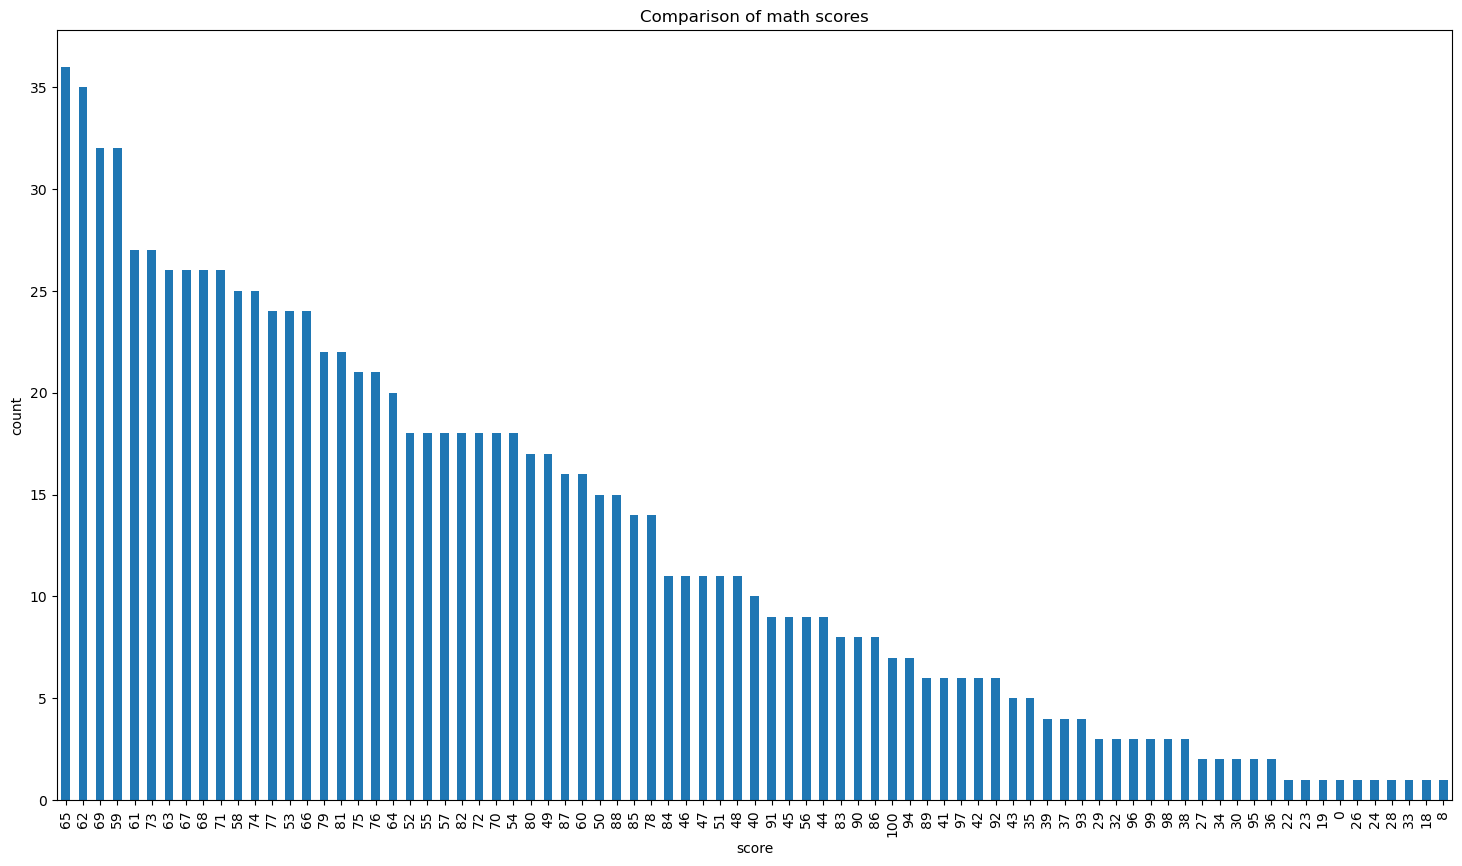

In [12]:
print(data['math score'].value_counts(normalize = True).unique())
print()
print(data['math score'].value_counts(normalize = True))
print()
data['math score'].value_counts(dropna = False).plot.bar(figsize = (18, 10))
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()                 # Visualizing maths score of students

72    0.034
74    0.033
64    0.032
67    0.030
73    0.030
      ...  
28    0.001
26    0.001
17    0.001
32    0.001
40    0.001
Name: reading score, Length: 72, dtype: float64



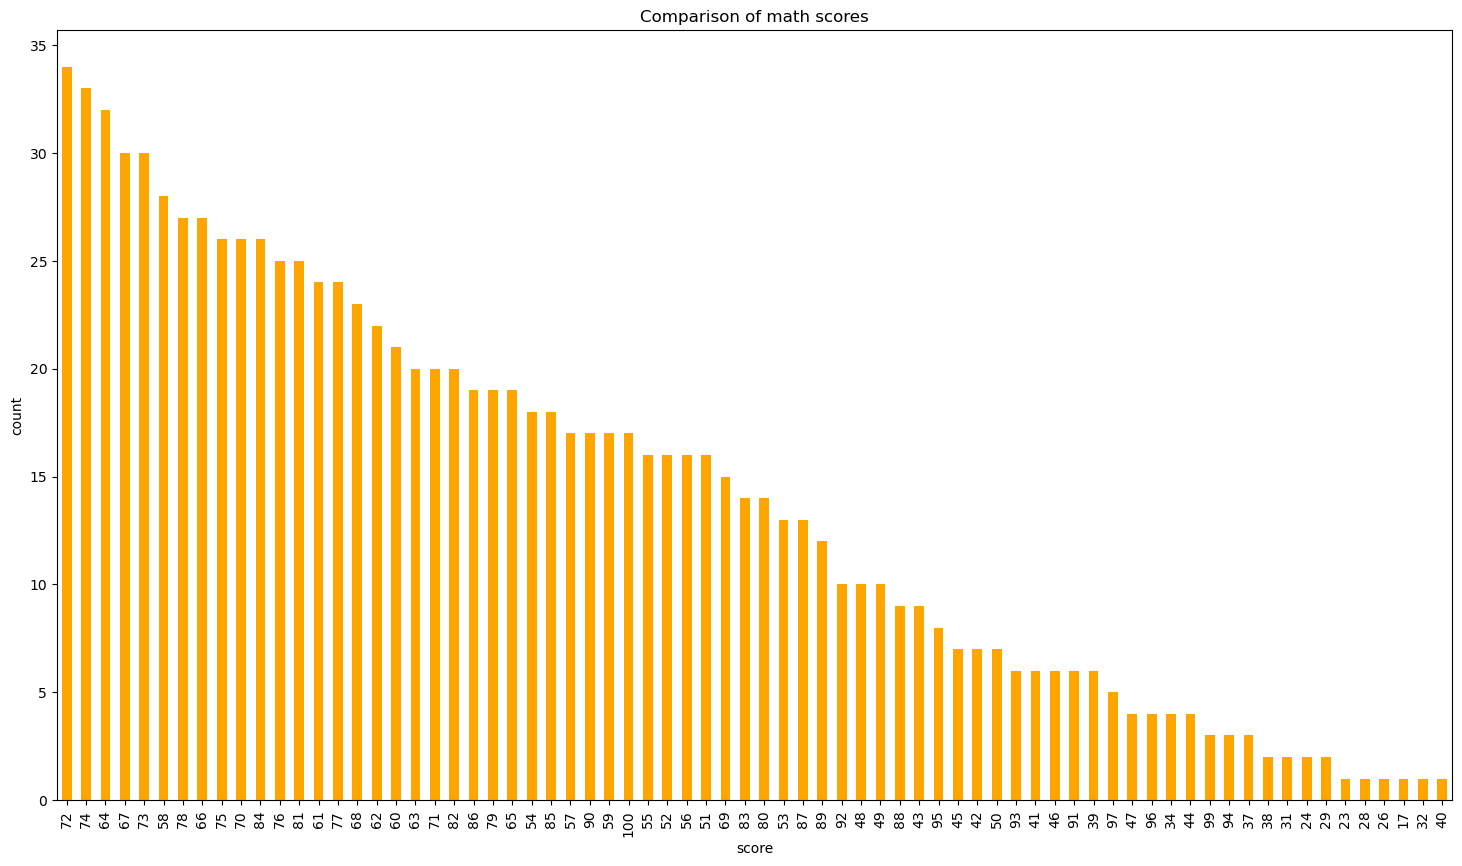

In [13]:
print(data['reading score'].value_counts(normalize = True))
print()
data['reading score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'orange')
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()                   # Visualizing reading score

74    0.035
70    0.033
68    0.031
73    0.028
80    0.027
      ...  
28    0.001
35    0.001
19    0.001
22    0.001
23    0.001
Name: writing score, Length: 77, dtype: float64



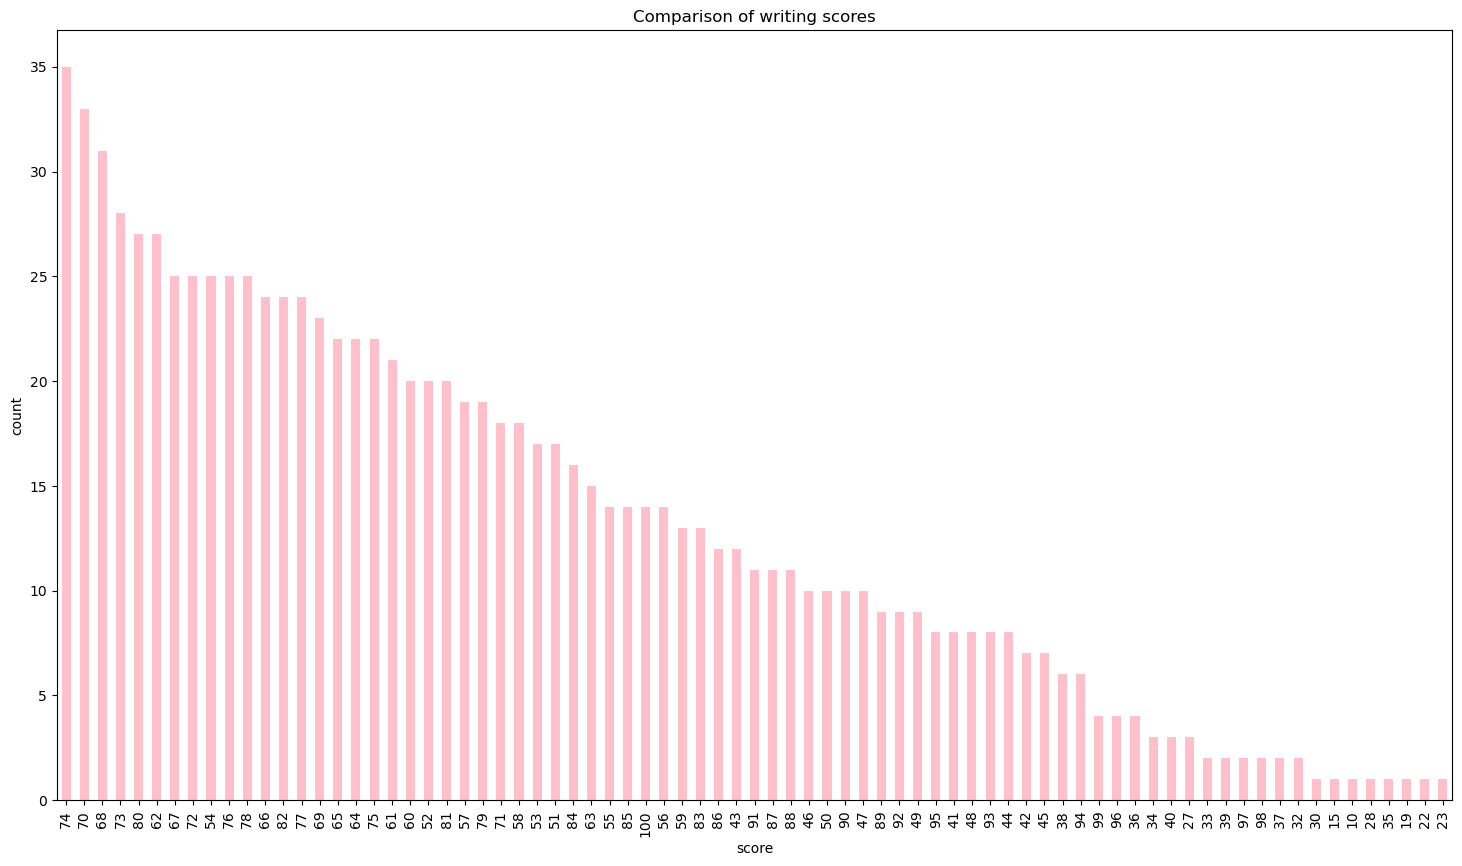

In [14]:
print((data['writing score'].value_counts(normalize = True)))
print()
data['writing score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'pink')
plt.title('Comparison of writing scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()                      # Visualizing writing score

<Axes: xlabel='gender'>

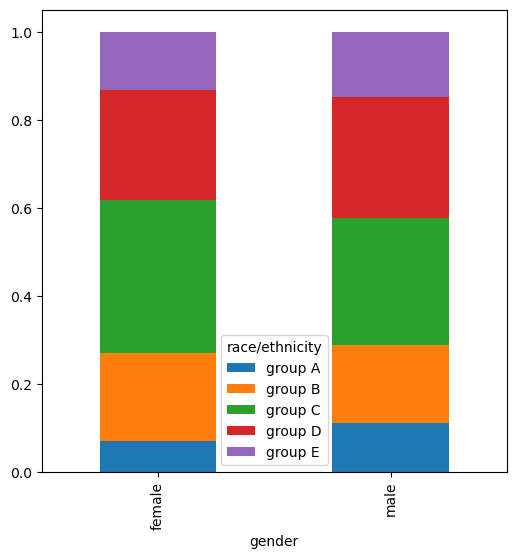

In [15]:
# Gender vs Etnicity 
x = pd.crosstab(data['gender'], data['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6, 6))

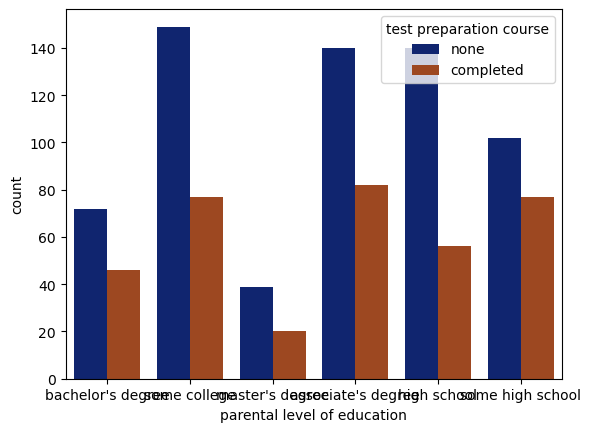

In [16]:
# Comparison of parental degree and test course
sns.countplot(x = 'parental level of education', data = data, hue = 'test preparation course', palette = 'dark')
plt.show()

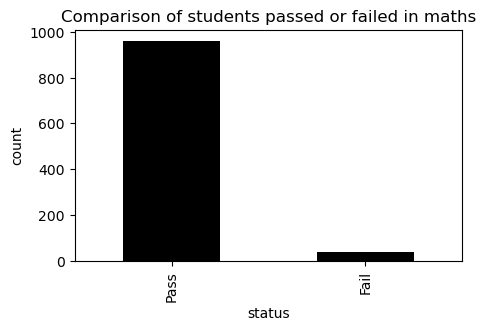


Pass    960
Fail     40
Name: pass_math, dtype: int64


In [17]:
# Feature Engineering on the data to visualize and solve the dataset more accurately
# Setting a passing mark for the students to pass on the three subjects individually
passmarks = 40
# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (5, 3))
plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()
print()
print(data['pass_math'].value_counts())

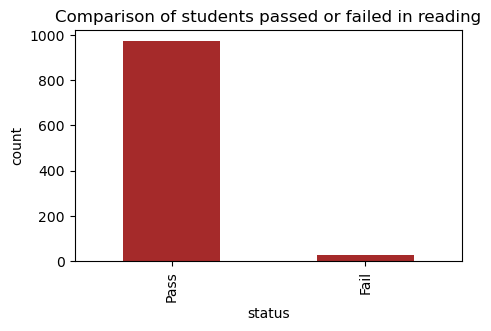


Pass    974
Fail     26
Name: pass_reading, dtype: int64


In [18]:
# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (5, 3))
plt.title('Comparison of students passed or failed in reading')
plt.xlabel('status')
plt.ylabel('count')
plt.show()
print()
print(data['pass_reading'].value_counts(dropna = False))

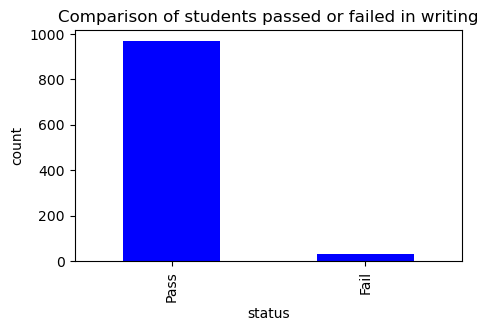


Pass    968
Fail     32
Name: pass_writing, dtype: int64


In [19]:
# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.bar(color = 'blue', figsize = (5, 3))

plt.title('Comparison of students passed or failed in writing')
plt.xlabel('status')
plt.ylabel('count')
plt.show()
print()
print(data['pass_writing'].value_counts(dropna = False))

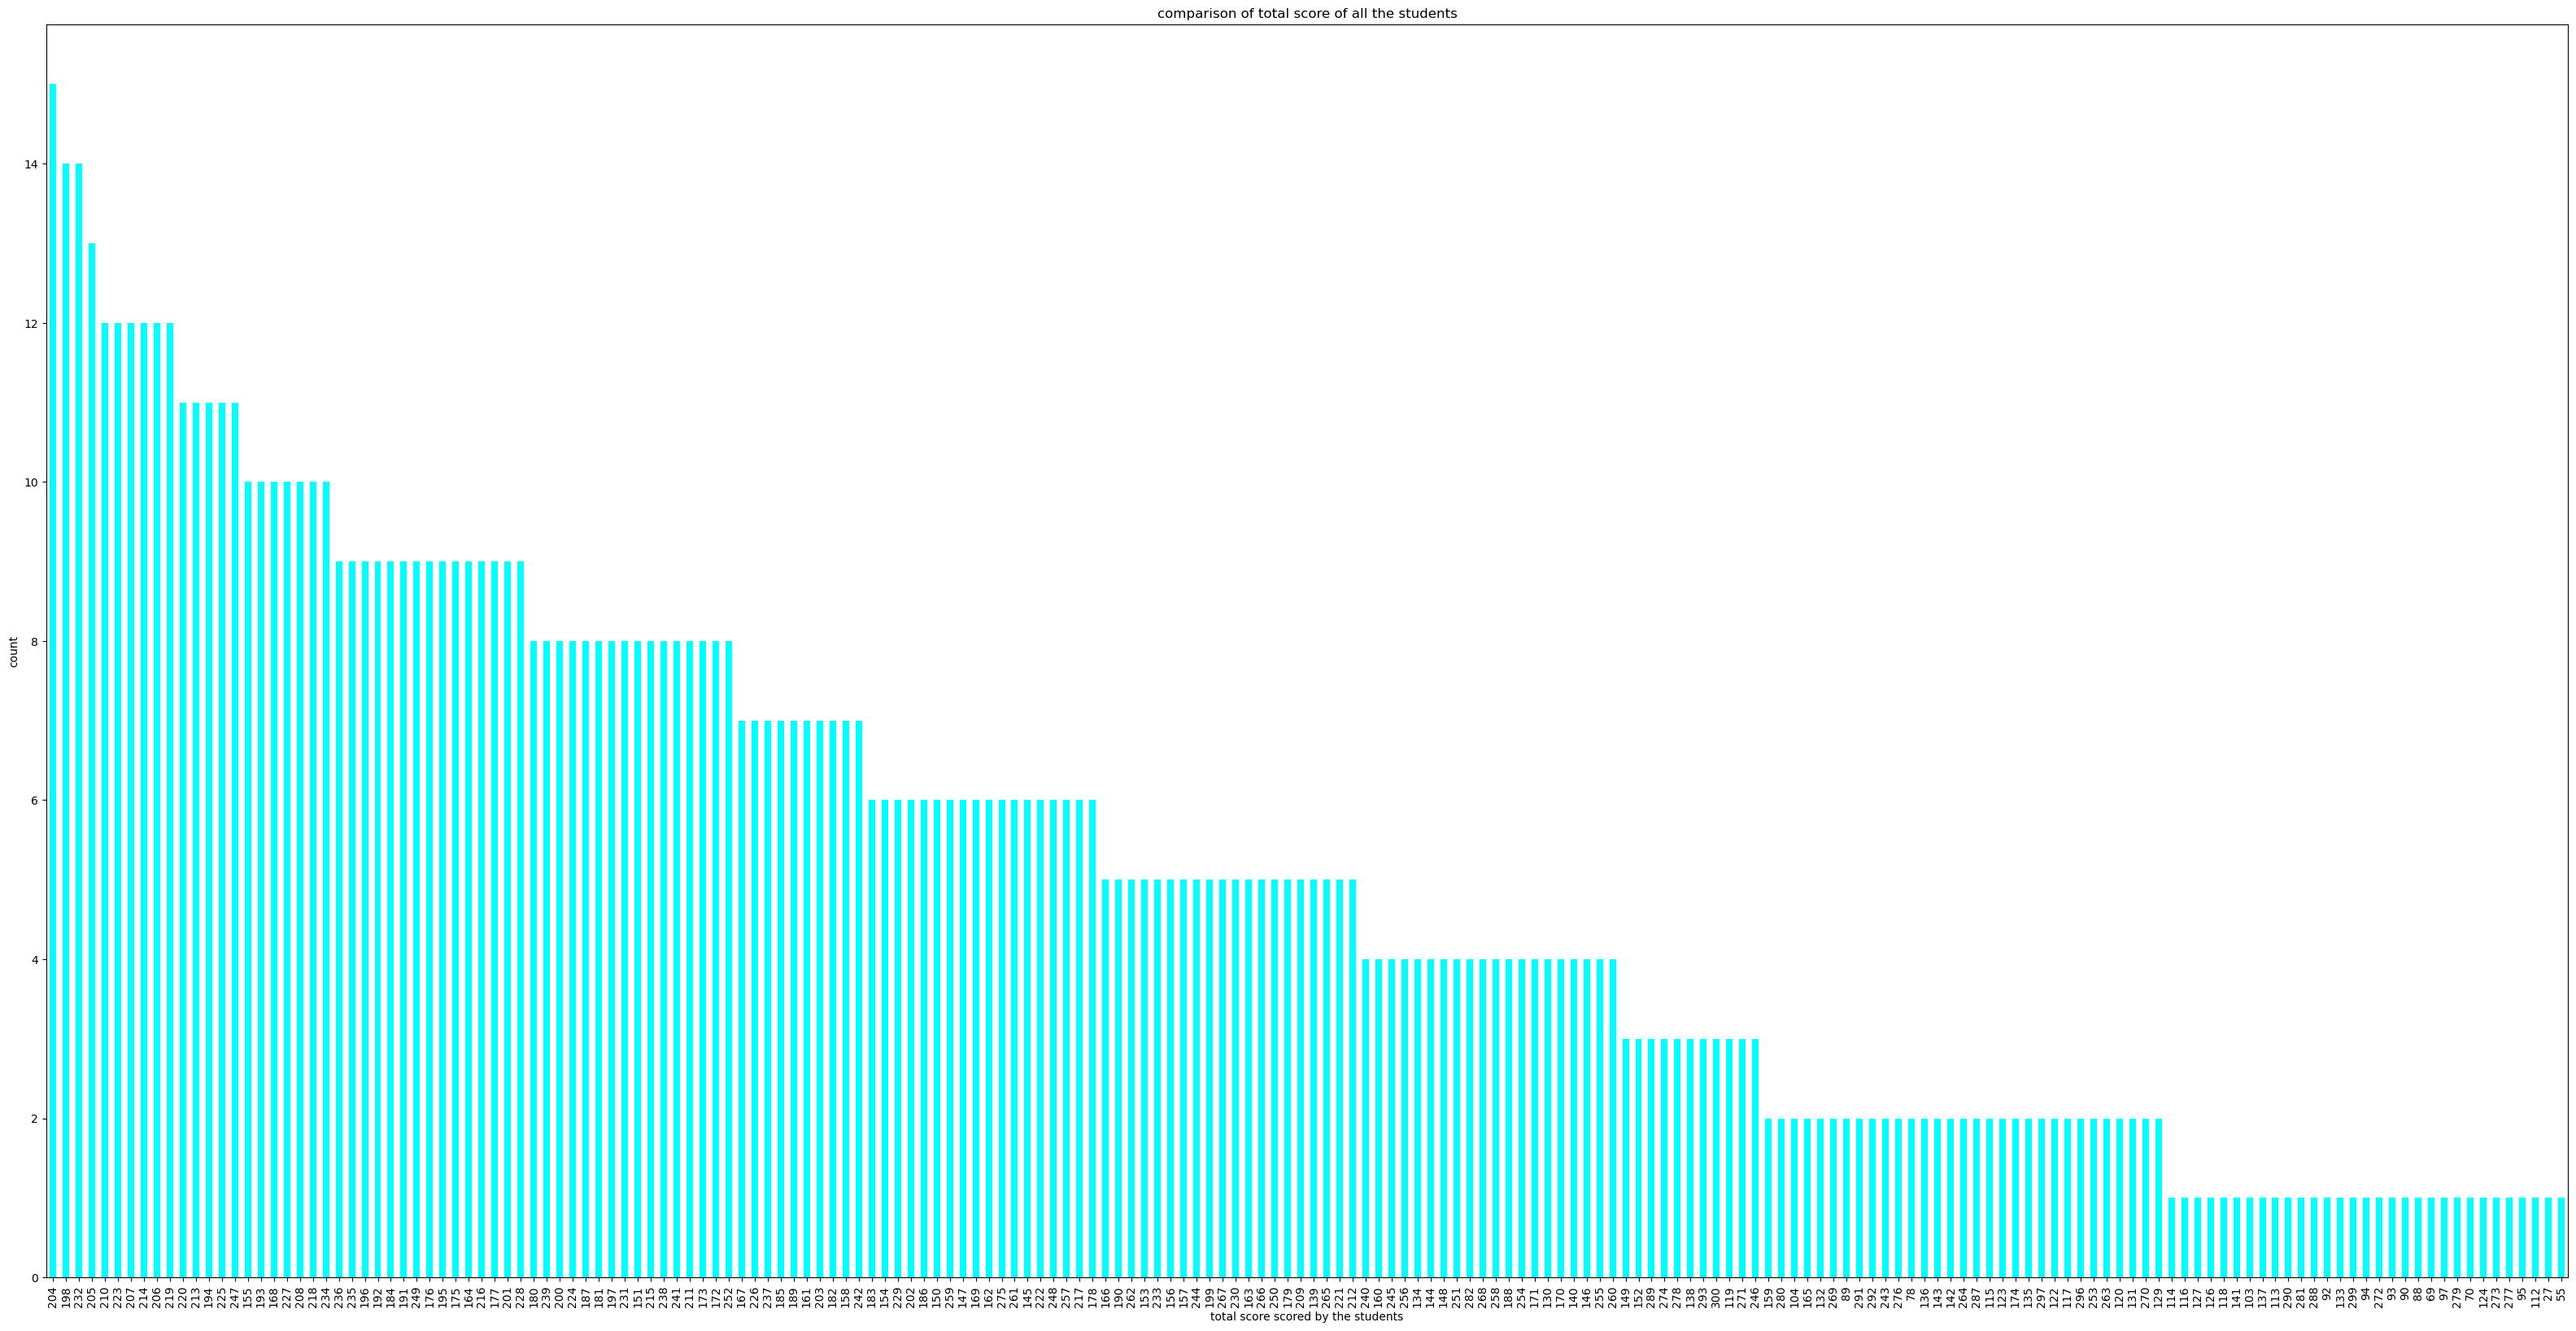

In [20]:
# computing the total score for each student
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
data['total_score'].value_counts(normalize = True)
data['total_score'].value_counts(dropna = True).plot.bar(color = 'cyan', figsize = (40,20))
plt.title('comparison of total score of all the students')
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

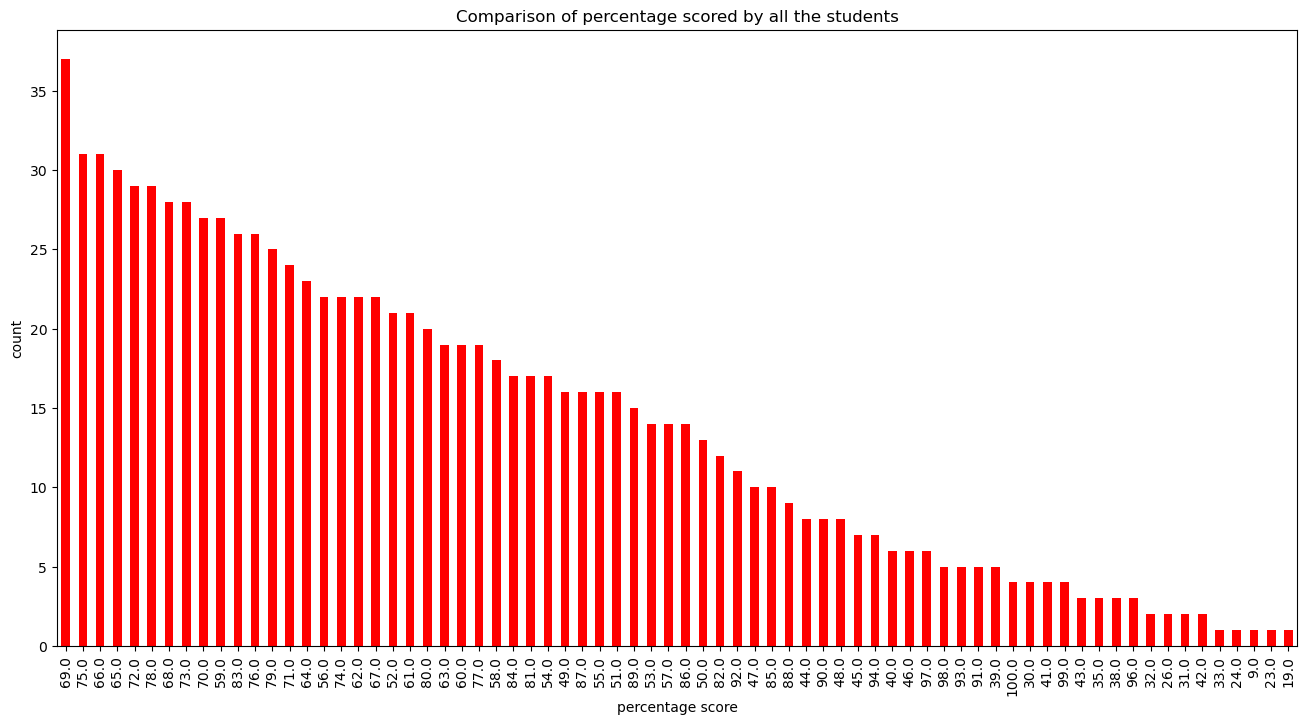

In [21]:
# computing percentage for each of the students
from math import * 
data['percentage'] = data['total_score']/3
for i in range(0, 1000):
  data['percentage'][i] = ceil(data['percentage'][i])
data['percentage'].value_counts(normalize = True)
data['percentage'].value_counts(dropna = False).plot.bar(figsize = (16, 8), color = 'red')
plt.title('Comparison of percentage scored by all the students')
plt.xlabel('percentage score')
plt.ylabel('count')
plt.show()

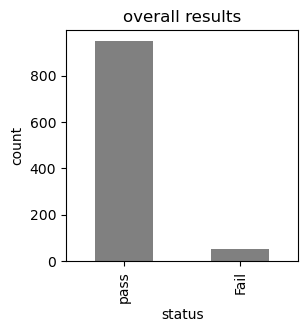

In [22]:
# checking which student is fail overall

data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.bar(color = 'gray', figsize = (3, 3))
plt.title('overall results')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [23]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'
data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )
data['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

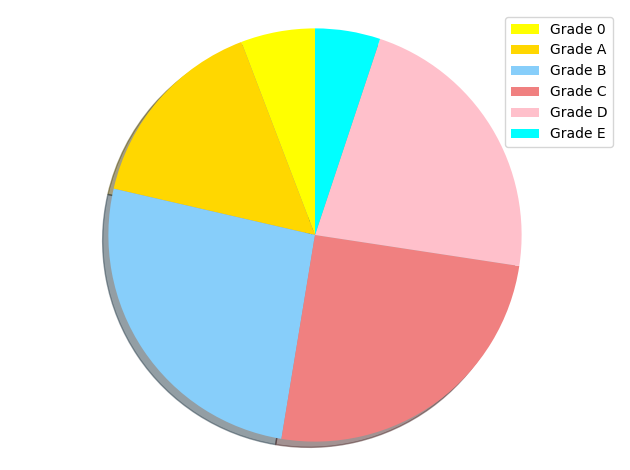

In [24]:
# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.axis('equal')
plt.tight_layout()
plt.show()

# FEATURE ENGINERRING

In [25]:
print(data['test preparation course'].value_counts())
print()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['test preparation course'] = le.fit_transform(data['test preparation course'])
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64



1    642
0    358
Name: test preparation course, dtype: int64

In [26]:
data['lunch'] = le.fit_transform(data['lunch'])
data['lunch'].value_counts()

1    645
0    355
Name: lunch, dtype: int64

In [27]:
# label encoding for race/ethnicity

data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)
data['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [28]:
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['parental level of education'].value_counts()

4    226
0    222
2    196
5    179
1    118
3     59
Name: parental level of education, dtype: int64

In [29]:
data['gender'] = le.fit_transform(data['gender'])
data['gender'].value_counts()

0    518
1    482
Name: gender, dtype: int64

In [30]:
data['pass_math'] = le.fit_transform(data['pass_math'])
data['pass_math'].value_counts()

1    960
0     40
Name: pass_math, dtype: int64

In [31]:
data['pass_reading'] = le.fit_transform(data['pass_reading'])
data['pass_reading'].value_counts()

1    974
0     26
Name: pass_reading, dtype: int64

In [32]:
data['pass_writing'] = le.fit_transform(data['pass_writing'])
data['pass_writing'].value_counts()

1    968
0     32
Name: pass_writing, dtype: int64

In [33]:
data['status'] = le.fit_transform(data['status'])
data['status'].value_counts()

1    949
0     51
Name: status, dtype: int64

In [34]:
# label encoding for grades

data['grades'] = data['grades'].replace('O', 0)
data['grades'] = data['grades'].replace('A', 1)
data['grades'] = data['grades'].replace('B', 2)
data['grades'] = data['grades'].replace('C', 3)
data['grades'] = data['grades'].replace('D', 4)
data['grades'] = data['grades'].replace('E', 5)
data['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [35]:
data.shape

(1000, 15)

In [36]:
# Splitting the dependent and independent variables
x = data.iloc[:,:14]
y = data.iloc[:,14]
print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [37]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [38]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

# Logistic Regression

In [39]:
from sklearn.linear_model import  LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8533333333333334
Testing Accuracy : 0.812


In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 3  8  0  0  0  0]
 [ 2 17 13  0  0  0]
 [ 0  0 60 12  0  0]
 [ 0  0  3 51  4  0]
 [ 0  0  0  4 57  0]
 [ 0  0  0  0  1 15]]


In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0  0  0  0]
 [ 0 32  0  0  0  0]
 [ 0  0 72  0  0  0]
 [ 0  0  0 58  0  0]
 [ 0  0  0  0 61  0]
 [ 0  0  0  0  0 16]]


In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0  0  0  0]
 [ 0 32  0  0  0  0]
 [ 0  0 72  0  0  0]
 [ 0  0  0 58  0  0]
 [ 0  0  0  0 61  0]
 [ 0  0  0  0  0 16]]


# CREATING A DATASET

In [45]:
import pandas as pd
import random

num_rows = 120
student_ids = [1, 2, 3, 4, 5,6,7,8,9,10]
names = ['Alice', 'Bob', 'Charlie', 'David', 'Emily']
ages = [20, 18, 19,17,]
genders = ['Female', 'Male']
grades = [12, 11, 12, 10, 11,19,17,16,'',None]
studying_class=['Tenth','Twelfth']
course=['completed',None]
phone_numbers = ['123-456-7890', '234-567-8901', '(345) 678-9012', '4567890123', '567-890-1234', None]

stud_data = {
    'student_ID': [random.choice(student_ids) for _ in range(num_rows)],
    'name': [random.choice(names) for _ in range(num_rows)],
    'age': [random.choice(ages) for _ in range(num_rows)],
    'gender': [random.choice(genders) for _ in range(num_rows)],
    'grade': [random.choice(grades) for _ in range(num_rows)],
    'class': [random.choice(studying_class) for _ in range(num_rows)],
    'course':[random.choice(course) for _ in range(num_rows)],
    'Phone Number': [random.choice(phone_numbers) for _ in range(num_rows)]                 }

df = pd.DataFrame(stud_data)
df.to_csv('C:\just folder\studfile.csv', index=False)

In [46]:
df=pd.read_csv("studfile.csv")
df

,student_ID,name,age,gender,grade,class,course,Phone Number
0,3,Charlie,20,Female,19.0,Tenth,NaN,(345) 678-9012
1,5,David,20,Male,10.0,Twelfth,NaN,NaN
2,7,Charlie,20,Male,12.0,Twelfth,completed,NaN
3,3,David,19,Female,12.0,Twelfth,NaN,567-890-1234
4,7,Charlie,19,Male,11.0,Twelfth,NaN,4567890123
...,...,...,...,...,...,...,...,...
115,7,Bob,19,Female,11.0,Twelfth,completed,234-567-8901
116,5,Emily,20,Male,12.0,Tenth,NaN,(345) 678-9012
117,3,Alice,20,Female,NaN,Twelfth,NaN,4567890123
118,6,Bob,20,Female,11.0,Twelfth,completed,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   student_ID    120 non-null    int64  
 1   name          120 non-null    object 
 2   age           120 non-null    int64  
 3   gender        120 non-null    object 
 4   grade         99 non-null     float64
 5   class         120 non-null    object 
 6   course        59 non-null     object 
 7   Phone Number  101 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 7.6+ KB


In [48]:
df.describe()

,student_ID,age,grade
count,120.000000,120.000000,99.000000
mean,5.516667,18.583333,13.363636
std,2.725489,1.065765,3.166968
min,1.000000,17.000000,10.000000
25%,3.000000,18.000000,11.000000
50%,6.000000,19.000000,12.000000
75%,8.000000,19.250000,16.000000
max,10.000000,20.000000,19.000000


In [49]:
print(df.shape)

(120, 8)


In [50]:
for i in df.columns:
    print(i,df[i].unique())
    print ("-----------------------------------------------------------------------------")

student_ID [ 3  5  7  9  2  4  6  8 10  1]
-----------------------------------------------------------------------------
name ['Charlie' 'David' 'Alice' 'Bob' 'Emily']
-----------------------------------------------------------------------------
age [20 19 18 17]
-----------------------------------------------------------------------------
gender ['Female' 'Male']
-----------------------------------------------------------------------------
grade [19. 10. 12. 11. 16. 17. nan]
-----------------------------------------------------------------------------
class ['Tenth' 'Twelfth']
-----------------------------------------------------------------------------
course [nan 'completed']
-----------------------------------------------------------------------------
Phone Number ['(345) 678-9012' nan '567-890-1234' '4567890123' '234-567-8901'
 '123-456-7890']
-----------------------------------------------------------------------------


In [51]:
df.isnull().sum()

student_ID       0
name             0
age              0
gender           0
grade           21
class            0
course          61
Phone Number    19
dtype: int64

# FEATURE ENGINERRING

In [52]:
print(df['course'].value_counts())
print()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['course'] = le.fit_transform(df['course'])
df['course'].value_counts()

completed    59
Name: course, dtype: int64



1    61
0    59
Name: course, dtype: int64

In [53]:
print(df['gender'].value_counts())
print()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
print(df['gender'].value_counts())

Male      62
Female    58
Name: gender, dtype: int64

1    62
0    58
Name: gender, dtype: int64


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   student_ID    120 non-null    int64  
 1   name          120 non-null    object 
 2   age           120 non-null    int64  
 3   gender        120 non-null    int32  
 4   grade         99 non-null     float64
 5   class         120 non-null    object 
 6   course        120 non-null    int32  
 7   Phone Number  101 non-null    object 
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 6.7+ KB


In [55]:
df['class'].replace(['Tenth'], 10, inplace=True)
df['class'].replace(['Twelfth'], 11, inplace=True)
df

,student_ID,name,age,gender,grade,class,course,Phone Number
0,3,Charlie,20,0,19.0,10,1,(345) 678-9012
1,5,David,20,1,10.0,11,1,NaN
2,7,Charlie,20,1,12.0,11,0,NaN
3,3,David,19,0,12.0,11,1,567-890-1234
4,7,Charlie,19,1,11.0,11,1,4567890123
...,...,...,...,...,...,...,...,...
115,7,Bob,19,0,11.0,11,0,234-567-8901
116,5,Emily,20,1,12.0,10,1,(345) 678-9012
117,3,Alice,20,0,NaN,11,1,4567890123
118,6,Bob,20,0,11.0,11,0,NaN


In [56]:
df.describe()

,student_ID,age,gender,grade,class,course
count,120.000000,120.000000,120.000000,99.000000,120.000000,120.000000
mean,5.516667,18.583333,0.516667,13.363636,10.558333,0.508333
std,2.725489,1.065765,0.501817,3.166968,0.498668,0.502027
min,1.000000,17.000000,0.000000,10.000000,10.000000,0.000000
25%,3.000000,18.000000,0.000000,11.000000,10.000000,0.000000
50%,6.000000,19.000000,1.000000,12.000000,11.000000,1.000000
75%,8.000000,19.250000,1.000000,16.000000,11.000000,1.000000
max,10.000000,20.000000,1.000000,19.000000,11.000000,1.000000


In [57]:
df['grade'].fillna(df['grade'].median(), inplace=True)
df['grade'].isnull().sum()

0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   student_ID    120 non-null    int64  
 1   name          120 non-null    object 
 2   age           120 non-null    int64  
 3   gender        120 non-null    int32  
 4   grade         120 non-null    float64
 5   class         120 non-null    int64  
 6   course        120 non-null    int32  
 7   Phone Number  101 non-null    object 
dtypes: float64(1), int32(2), int64(3), object(2)
memory usage: 6.7+ KB


In [59]:
new_df=df.drop(columns=['student_ID','name','Phone Number'])
new_df.head()

,age,gender,grade,class,course
0,20,0,19.0,10,1
1,20,1,10.0,11,1
2,20,1,12.0,11,0
3,19,0,12.0,11,1
4,19,1,11.0,11,1


In [60]:
new_df1=new_df.drop('grade',axis='columns')
new_df1.head()

,age,gender,class,course
0,20,0,10,1
1,20,1,11,1
2,20,1,11,0
3,19,0,11,1
4,19,1,11,1


In [61]:
grade=df.grade
grade

0      19.0
1      10.0
2      12.0
3      12.0
4      11.0
       ... 
115    11.0
116    12.0
117    12.0
118    11.0
119    12.0
Name: grade, Length: 120, dtype: float64

# REGRESSION

In [62]:
reg=linear_model.LinearRegression()
reg.fit(new_df1,grade)

LinearRegression()

In [63]:
#PREDICT THE GRADE OF THE STUDENT WITH age=19,gender=0(MALE),class=10

reg.predict([[19,0,10,1]])

array([12.90130647])

In [64]:
reg.coef_

array([ 0.1844531 ,  0.00571867,  0.4145057 , -0.13456677])

In [65]:
reg.intercept_

5.386207378120808

In [66]:
19*(0.1844531) + 0*(-0.00571867) + 10* 0.4145057 + 1*(-0.13456677) +5.391926043238934

12.907025173238933

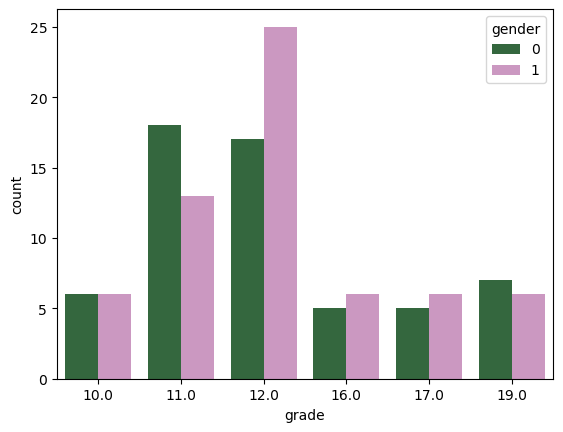

In [67]:
# Comparing the distribution of grades among males and females
# MALE-0 ,FEMALE-1
sns.countplot(x = df['grade'], data = df, hue = df['gender'], palette = 'cubehelix')
plt.show()

In [68]:
df.head()

,student_ID,name,age,gender,grade,class,course,Phone Number
0,3,Charlie,20,0,19.0,10,1,(345) 678-9012
1,5,David,20,1,10.0,11,1,NaN
2,7,Charlie,20,1,12.0,11,0,NaN
3,3,David,19,0,12.0,11,1,567-890-1234
4,7,Charlie,19,1,11.0,11,1,4567890123


In [69]:
df.describe()

,student_ID,age,gender,grade,class,course
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.516667,18.583333,0.516667,13.125000,10.558333,0.508333
std,2.725489,1.065765,0.501817,2.920695,0.498668,0.502027
min,1.000000,17.000000,0.000000,10.000000,10.000000,0.000000
25%,3.000000,18.000000,0.000000,11.000000,10.000000,0.000000
50%,6.000000,19.000000,1.000000,12.000000,11.000000,1.000000
75%,8.000000,19.250000,1.000000,16.000000,11.000000,1.000000
max,10.000000,20.000000,1.000000,19.000000,11.000000,1.000000


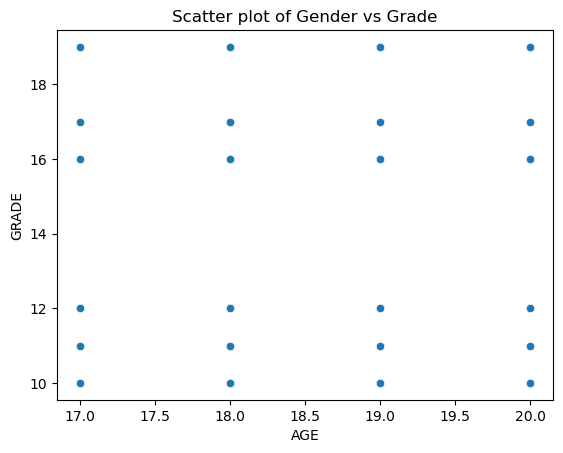

In [70]:
sns.scatterplot(x='age', y='grade', data=df)
plt.title('Scatter plot of Gender vs Grade')
plt.xlabel('AGE')
plt.ylabel('GRADE')
plt.show()

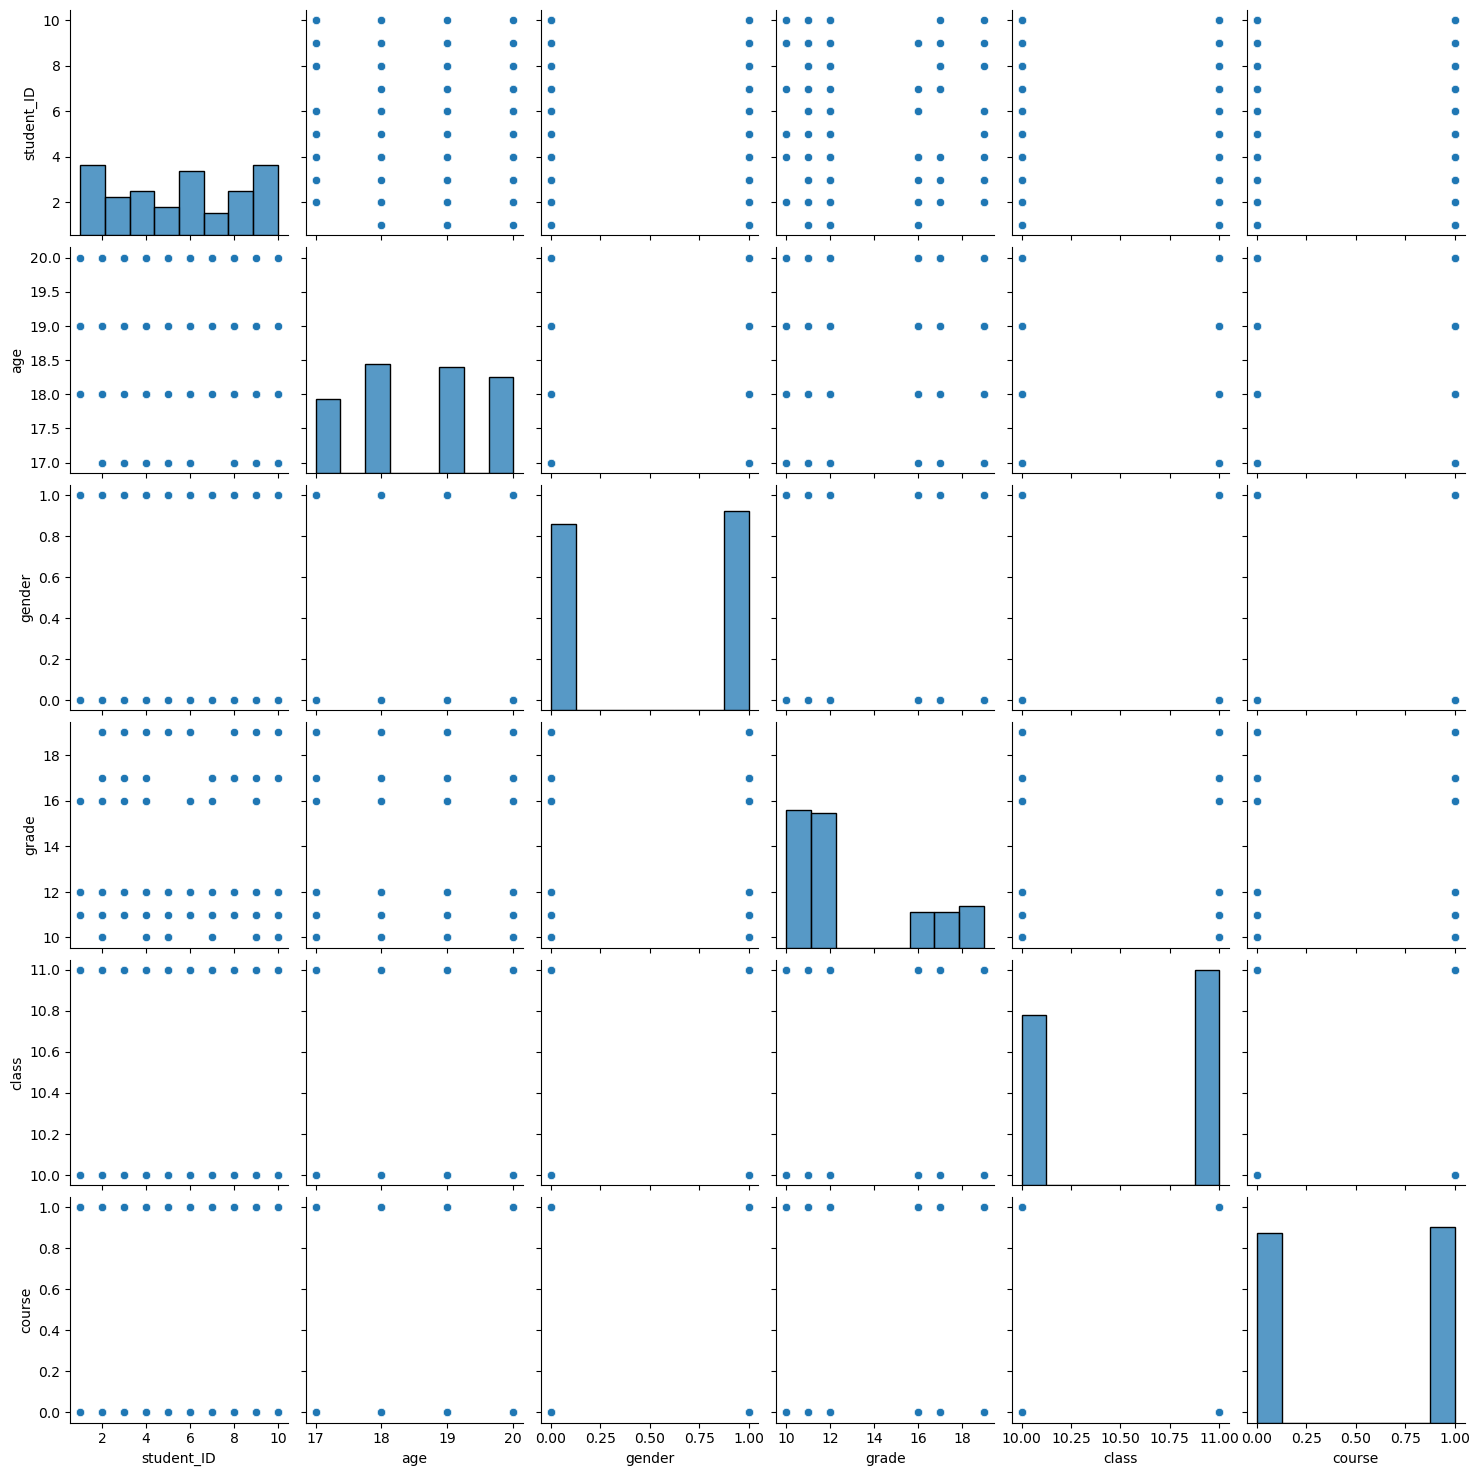

In [71]:
sns.pairplot(df)
plt.show()

In [72]:
df.columns

Index(['student_ID', 'name', 'age', 'gender', 'grade', 'class', 'course',
       'Phone Number'],
      dtype='object')

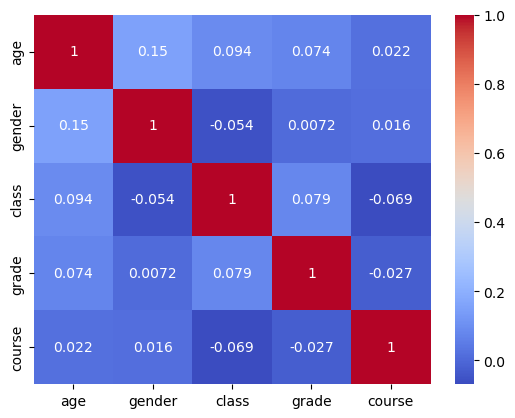

In [73]:
data=df[['name', 'age','gender','class','grade','course']]
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()